# Heart Disease Prediction

### importing the main libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### load the data
#### The dataset contains patient health details with a target variable indicating heart disease presence

In [4]:
data = pd.read_csv('heart_disease-final.csv', encoding = "latin-1")

In [6]:
data

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


Remark: the dataset has 303 rows with 14 features 

In [9]:
data = data.rename(columns={'ï»¿age': 'age'})

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age: Age of the patient in years

sex Gender of the patient (0 = male, 1 = female)

cp Chest pain type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic

trestbps Resting blood pressure in mm Hg

chol Serum cholesterol in mg/dl

fbs Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)

restecg Resting electrocardiographic results: 0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy

thalach Maximum heart rate achieved during a stress test

exang Exercise-induced angina (1 = yes, 0 = no)

oldpeak ST depression induced by exercise relative to rest

slope Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping

ca Number of major vessels (0-4) colored by fluoroscopy

thal Thalium stress test result: 0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described

target Heart disease status (0 = no disease, 1 = presence of disease)

#### All the categorical feature are already encoded, so the dataset doesn't required to be encoded 

### Data preprocessing

#### Checking the missing value

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Remark: there is no missing values in the dataset 

In [22]:
data.duplicated().sum()

0

#### after checking for duplicated feature, no duplicated features found

In [25]:
data.shape

(303, 14)

# Exploratory Data Analysis

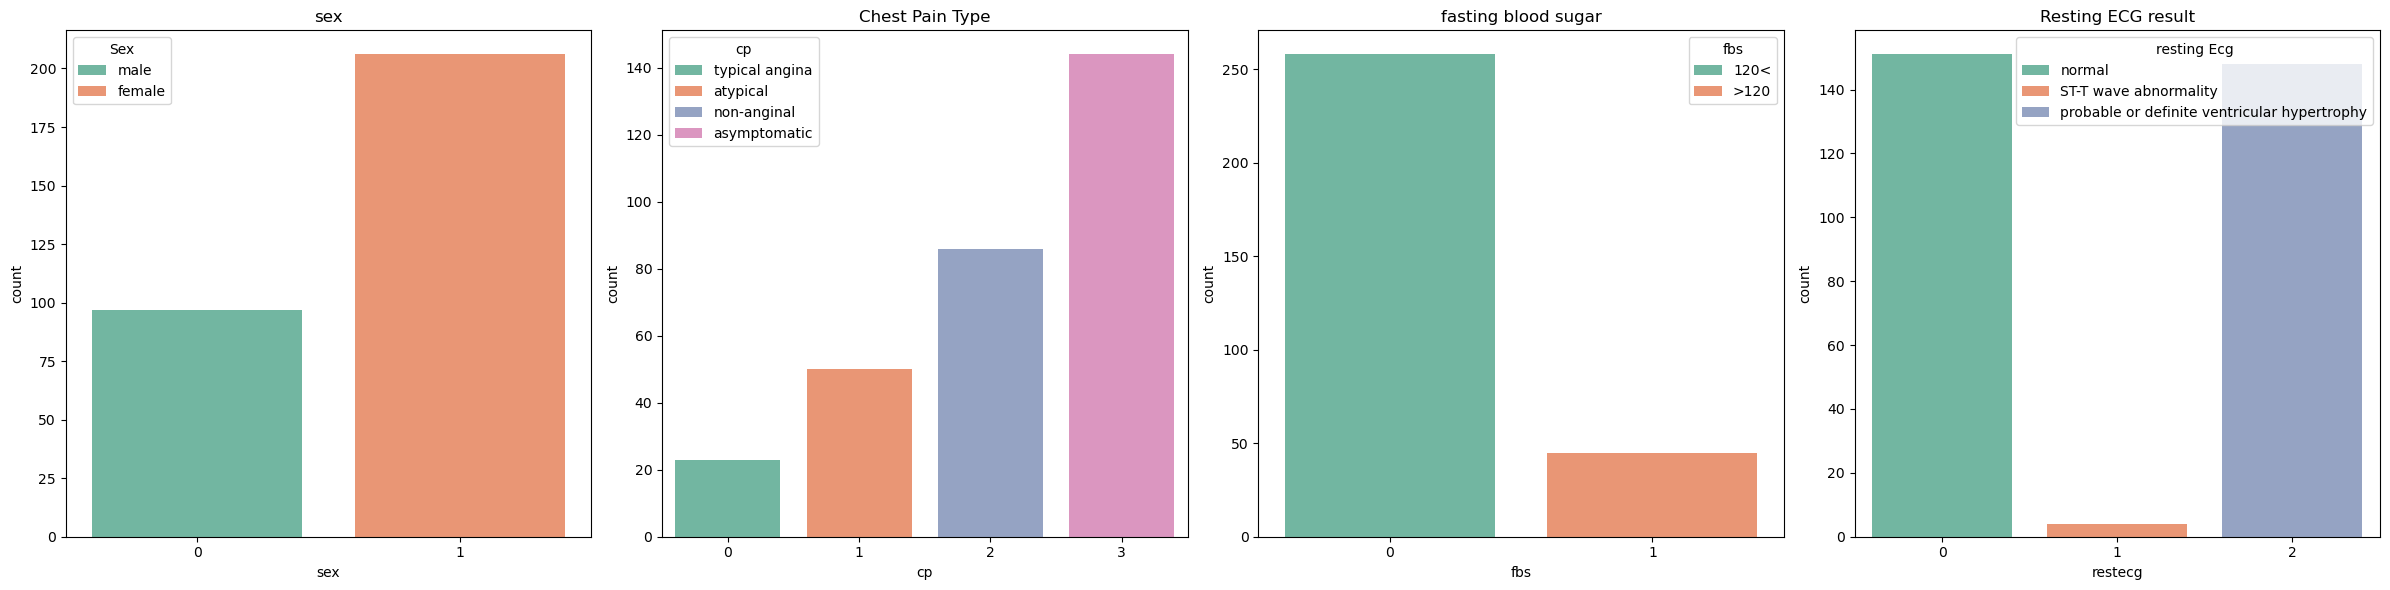

In [28]:
f, axes = plt.subplots(1, 4, figsize=(24, 6))
sns.countplot(ax=axes[0],x='sex', data=data, palette='Set2',hue="sex")
axes[0].set_title("sex", fontsize=12)
axes[0].legend(title="Sex", labels=['male','female'])

sns.countplot(ax=axes[1],x='cp', data=data, palette='Set2',hue="cp")
axes[1].set_title("Chest Pain Type", fontsize=12)
axes[1].legend(title="cp", labels=['typical angina','atypical','non-anginal','asymptomatic'])

sns.countplot(ax=axes[2],x='fbs', data=data, palette='Set2',hue="fbs")
axes[2].set_title("fasting blood sugar", fontsize=12)
axes[2].legend(title="fbs", labels=['120<', '>120'])

sns.countplot(ax=axes[3],x='restecg', data=data, palette='Set2',hue="restecg")
plt.title("Resting ECG result", fontsize=12)
plt.legend(title="resting Ecg", labels=['normal', 'ST-T wave abnormality', 'probable or definite ventricular hypertrophy'])
plt.savefig("Eda1.png", dpi=100, bbox_inches="tight")
plt.tight_layout()

Remark: female patients with asymptomatic chest pain, normal sugar level and with ecg showing normal or ventricular hypertrophy

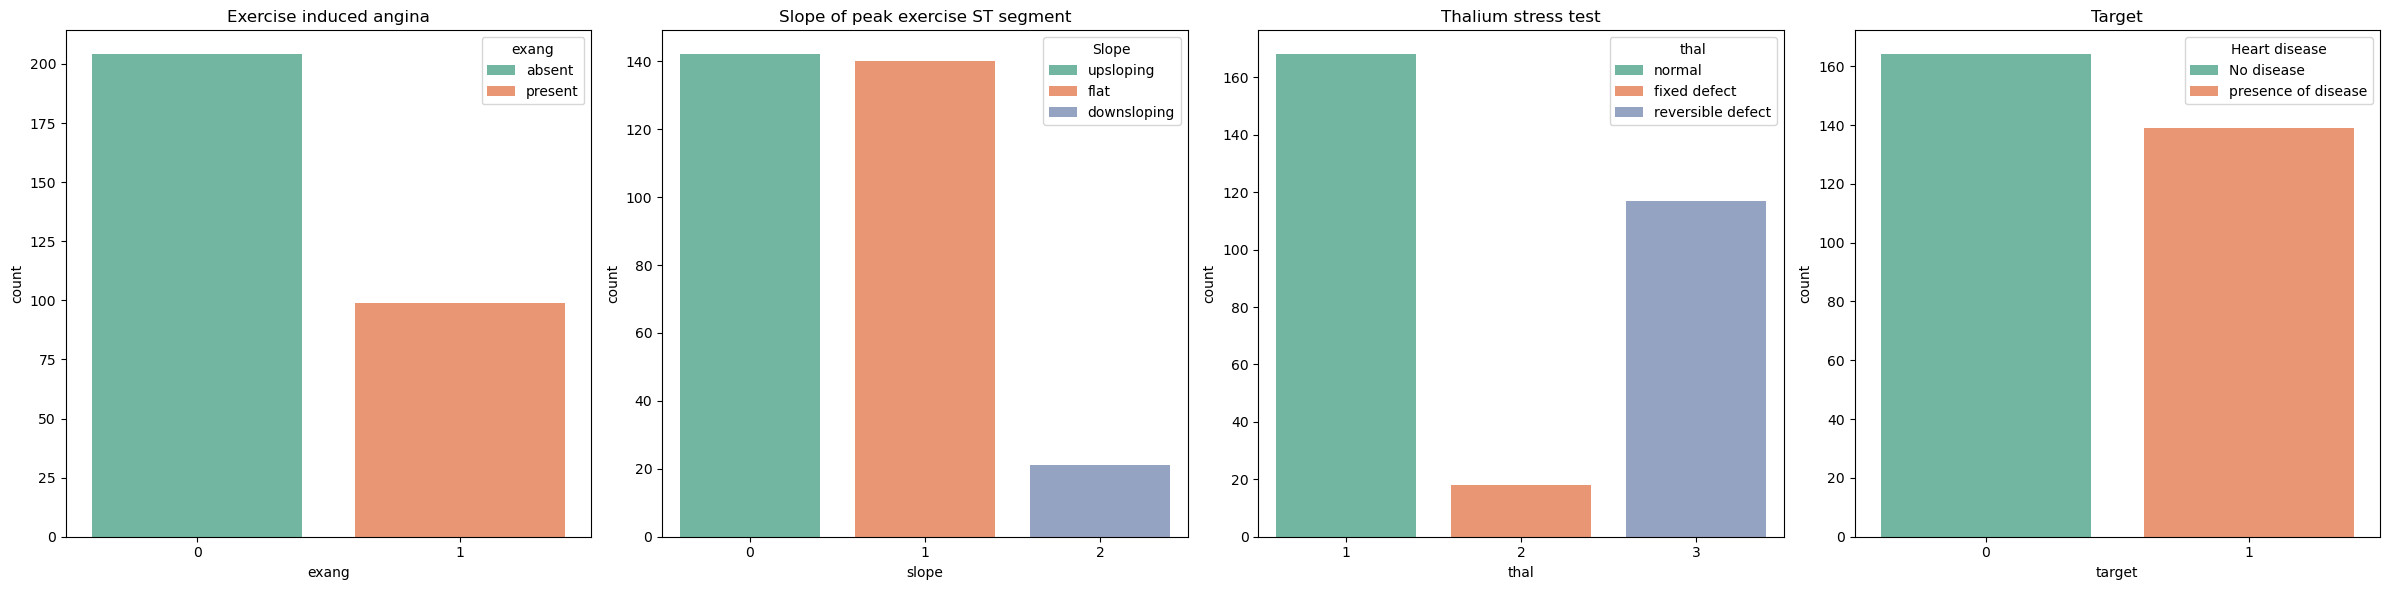

In [31]:
f, axes = plt.subplots(1, 4, figsize=(24, 6))
sns.countplot(ax=axes[0],x='exang', data=data, palette='Set2',hue="exang")
axes[0].set_title("Exercise induced angina", fontsize=12)
axes[0].legend(title="exang", labels=['absent', 'present'])

sns.countplot(ax=axes[1],x='slope', data=data, palette='Set2',hue="slope")
axes[1].set_title("Slope of peak exercise ST segment", fontsize=12)
axes[1].legend(title="Slope", labels=['upsloping', 'flat','downsloping'])

sns.countplot(ax=axes[2],x='thal', data=data, palette='Set2',hue="thal")
axes[2].set_title("Thalium stress test", fontsize=12)
axes[2].legend(title="thal", labels=['normal','fixed defect', 'reversible defect'])

sns.countplot(ax=axes[3],x='target', data=data, palette='Set2',hue="target")
plt.title("Target", fontsize=12)
plt.legend(title="Heart disease", labels=['No disease', 'presence of disease',])
plt.savefig("Eda2.png", dpi=100, bbox_inches="tight")
plt.tight_layout()

Remark: patients with no exercise induced angina present more, but ECG show asymptomatic and typical angina in most patients. About 250 patients have thalassaemia. More than half of the patients have heart disease (target) in this dataset 

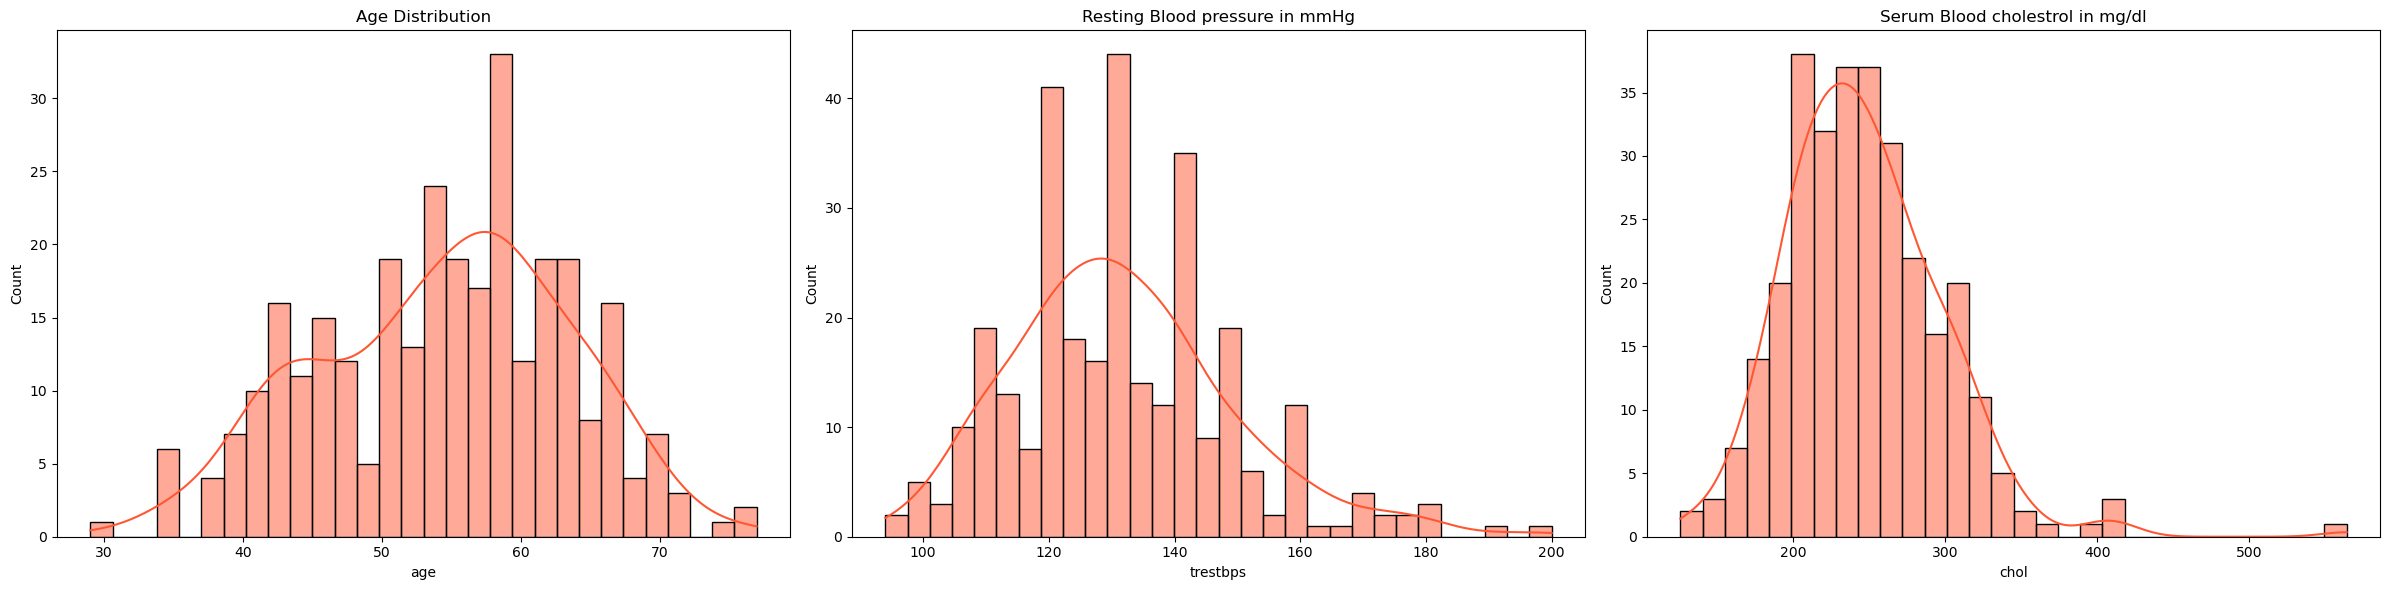

In [34]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.histplot(data['age'], bins=30, kde=True, color='#FF5733',ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=12)

sns.histplot(data['trestbps'], bins=30, kde=True, color='#FF5733',ax=axes[1])
axes[1].set_title("Resting Blood pressure in mmHg", fontsize=12)

sns.histplot(data['chol'], bins=30, kde=True, color='#FF5733',ax=axes[2])
plt.title("Serum Blood cholestrol in mg/dl", fontsize=12)
plt.savefig("Eda3.png", dpi=100, bbox_inches="tight")
plt.tight_layout()

Remark: most patients' age is between 50 and 60 years, resting blood pressure is 120-150 mmHg and serum cholestrol is about 220 mg/dl

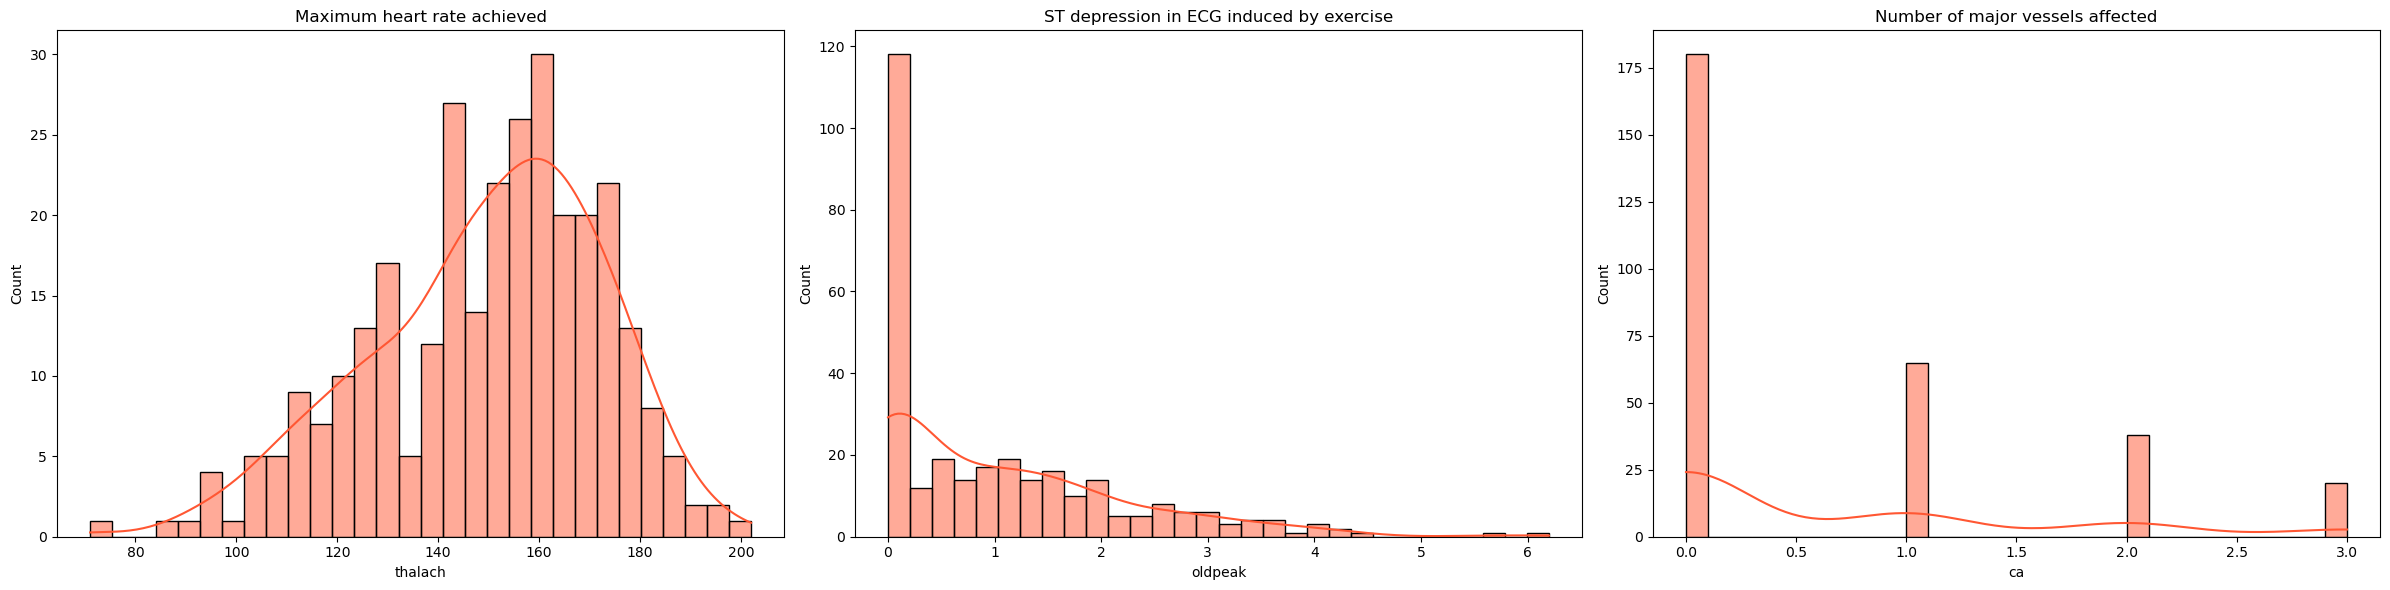

In [37]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.histplot(data['thalach'], bins=30, kde=True, color='#FF5733',ax=axes[0])
axes[0].set_title("Maximum heart rate achieved", fontsize=12)

sns.histplot(data['oldpeak'], bins=30, kde=True, color='#FF5733',ax=axes[1])
axes[1].set_title("ST depression in ECG induced by exercise", fontsize=12)

sns.histplot(data['ca'], bins=30, kde=True, color='#FF5733',ax=axes[2])
plt.title("Number of major vessels affected", fontsize=12)
plt.savefig("Eda4.png", dpi=100, bbox_inches="tight")
plt.tight_layout()

Remark: most patients' heart rate is 140 and ST depression and number of affeced major is near zero

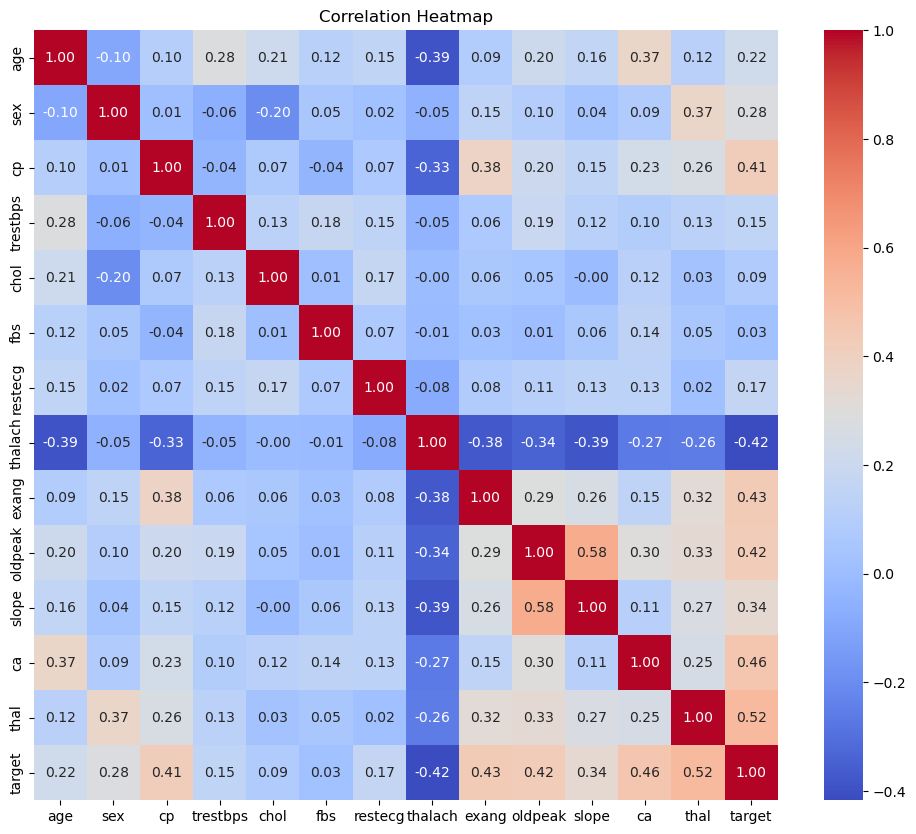

In [40]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig("correlationHeatmap.png", dpi=100, bbox_inches="tight")
plt.show()

In [41]:
correlation_matrix = data.corr()
print(correlation_matrix['target'].abs())

age         0.223120
sex         0.276816
cp          0.414446
trestbps    0.150825
chol        0.085164
fbs         0.025264
restecg     0.169202
thalach     0.417167
exang       0.431894
oldpeak     0.424510
slope       0.339213
ca          0.460033
thal        0.515894
target      1.000000
Name: target, dtype: float64


Remark: after checking correlation heatmap and correction to target, all features are seen to be correlated, so no need to drop more column.

### After preprocessing, import nessary libraries to prepare for the models prediction and evalution

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report

### Separating the data into feature (X) and target (y) and splitting the data into train data and test data

In [48]:
#define the target x and y
X = data.drop(columns=['target'])
y = data['target']

In [51]:
#split the data into training and testing
#standardize the feature

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####  Since the dataset has structured tabular data with many numerical and categorical features, a Feedforward Neural Network (DNN) (also called a Multilayer Perceptron - MLP) is the best choice.

In [58]:
# Build Neural Network model
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model with adjusted learning rate
optimizer = Adam(learning_rate=0.0005)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/Users/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Plot model architecture
plot_model(model1, show_shapes=True, show_dtype=True, show_layer_names=True,
           show_layer_activations=True, show_trainable=True, rankdir='TB', 
           expand_nested=False, dpi=70)

# Training parameters
batch_size = 16
epochs = 50
callbacks = []  # Define any callbacks if needed


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [62]:
# Train model
history1 = model1.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=callbacks)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4271 - loss: 1.1049 - val_accuracy: 0.4754 - val_loss: 6.1528
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 0.8663 - val_accuracy: 0.4754 - val_loss: 3.9768
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 0.8256 - val_accuracy: 0.4754 - val_loss: 2.3017
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5814 - loss: 0.7500 - val_accuracy: 0.4754 - val_loss: 1.2987
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 0.8125 - val_accuracy: 0.4918 - val_loss: 0.9491
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.7032 - val_accuracy: 0.5410 - val_loss: 0.7694
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5872 - loss: 0.8233 - val_accuracy: 0.6393 - val_loss: 0.7210
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.6809 - val_accuracy: 0.6393 - val_loss:

In [64]:
# Save model
model1.save("Model-dnn.h5")
print('Model saved to Disk')

# Save training history
df = pd.DataFrame(history1.history) 
df.to_excel("output1.xlsx")
df.head(20)

Model saved to Disk


,accuracy,loss,val_accuracy,val_loss
0,0.471074,1.040257,0.475410,6.152811
1,0.545455,0.814937,0.475410,3.976830
2,0.603306,0.796935,0.475410,2.301713
3,0.578512,0.813363,0.475410,1.298738
4,0.549587,0.822340,0.491803,0.949127
5,0.623967,0.793713,0.540984,0.769440
6,0.570248,0.822498,0.639344,0.721033
7,0.644628,0.716074,0.639344,0.651954
8,0.590909,0.757180,0.655738,0.624328
9,0.603306,0.721329,0.672131,0.607517


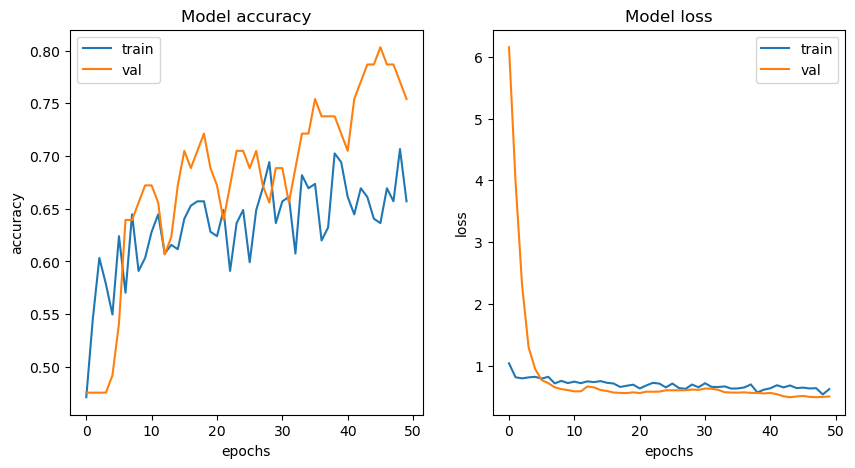

In [66]:
# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history1.history[met])
    ax[i].plot(history1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig("Model1-Results.png")


Evaluate on test data
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7527 - loss: 0.5006
Test loss, test acc: [0.5038376450538635, 0.7540983557701111]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1] [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


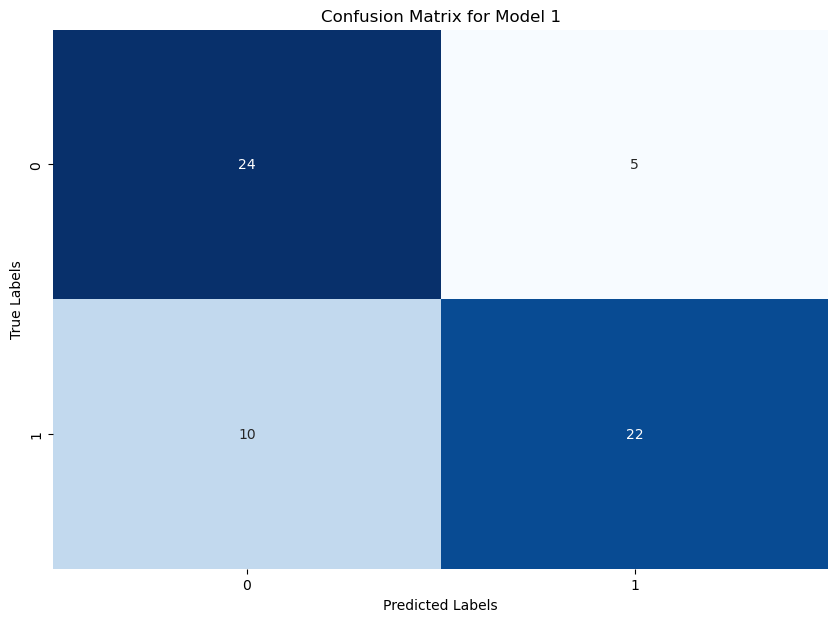

In [68]:
# Evaluate the model
print("Evaluate on test data")
results1 = model1.evaluate(X_test, y_test)
print("Test loss, test acc:", results1)

# Make predictions
y_pred_model1 = model1.predict(X_test)
y_pred_model1 = [1 if prediction > 0.5 else 0 for prediction in y_pred_model1]
print(y_test.values, y_pred_model1)

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_model1)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Model 1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [70]:
# Classification Report
print("Classification Report for Model 1")
print(classification_report(y_test, y_pred_model1))

Classification Report for Model 1
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



Remark: Heart disease Positive Class, Precision: 0.81, Recall: 0.69, F1 Score: 0.75. Accuracy of the feedforward neural network(DNN) with this dataset is 0.75 (75%).


### After prediction with neural network, multiple machine learning algorithms are used to compare the evauation results

Running Grid Search for KNeighborsClassifier...
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'distance'}
Running Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
Running Grid Search for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Running Grid Search for GradientBoostingClassifier...
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.2, 'n_estimators': 100}
Running Grid Search for SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'linear'}
Running Grid Search for ExtraTreesClassifier...
Best parameters for ExtraTreesClassifier: {'max_depth': None, 'n_estimators': 50}


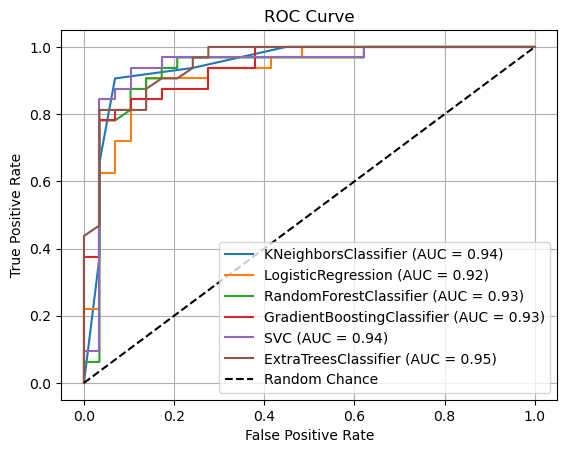

,Model,Accuracy,Precision,Recall,F1-Score
0,KNeighborsClassifier,0.918033,0.935484,0.906250,0.920635
1,LogisticRegression,0.885246,0.878788,0.906250,0.892308
2,RandomForestClassifier,0.868852,0.900000,0.843750,0.870968
3,GradientBoostingClassifier,0.852459,0.870968,0.843750,0.857143
4,SVC,0.901639,0.933333,0.875000,0.903226
5,ExtraTreesClassifier,0.836066,0.866667,0.812500,0.838710


In [74]:
# Define models
models = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(probability=True, random_state=42),  # Enable probability for ROC curve
    ExtraTreesClassifier(random_state=42)
]

# Define hyperparameter grids for each model
param_grids = {
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'ExtraTreesClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

results = []
    
for x in models:

    model_name = x.__class__.__name__
    print(f"Running Grid Search for {model_name}...")
    
    # Get the corresponding parameter grid
    param_grid = param_grids.get(model_name, {})
    if param_grid:
        grid_search = GridSearchCV(estimator=x, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test_scaled)
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None
    
    x.fit(X_train_scaled, y_train)
    y_pred = x.predict(X_test_scaled)

    # ROC Curve (for binary or multi-class classification)
    if hasattr(x, "predict_proba"):
        y_prob = x.predict_proba(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])  # Only for positive class
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{x.__class__.__name__} (AUC = {roc_auc:.2f})') 
    # Collect results
    results.append({
        'Model': x.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),  # Adjust `average` for multiclass
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    })
    
# Add ROC curve decorations
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("ROCcurve.png", dpi=100, bbox_inches="tight")
plt.show()
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
# Define a highlight function
def highlight_max(s):
    is_max = s == s.max()  # Identify maximum value in each column
    return ['background-color: red; color:black;' if v else '' for v in is_max]

# Apply the highlight function to the DataFrame
styled_results = results_df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the styled DataFrame
styled_results

In [75]:
for y in models:
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {y.__class__.__name__}:\n{cm}\n')

Confusion Matrix for KNeighborsClassifier:
[[25  4]
 [ 6 26]]

Confusion Matrix for LogisticRegression:
[[25  4]
 [ 6 26]]

Confusion Matrix for RandomForestClassifier:
[[25  4]
 [ 6 26]]

Confusion Matrix for GradientBoostingClassifier:
[[25  4]
 [ 6 26]]

Confusion Matrix for SVC:
[[25  4]
 [ 6 26]]

Confusion Matrix for ExtraTreesClassifier:
[[25  4]
 [ 6 26]]

